In [450]:
import requests
from bs4 import BeautifulSoup
import lxml
import re
import datetime
import pandas as pd

In [27]:
urllink = "https://www.car.gr/classifieds/cars/?category=11&condition=used&doors=4-5&engine_size-from=%3E1000&fromfeed=1&fuel_type=1&fuel_type=8&mileage-to=%3C200000&pg=2&price-from=%3E8000&price-to=%3C25000&registration-from=%3E2015&rg=2"

#html_text = requests.get(urllink)
#with open(cargr.html):
#    html_text = 
soup = BeautifulSoup(html_text.content, "html.parser")

# The goal is to load the first link and parse the pages by finding the 'next' button, until it reaches the end.

In [127]:
# regular expression to pick up kilometers
re1 = re.compile("(\d{1,3}\.\d{3}|\d{1,3})")
re2 = re.compile("\d{2}/\d{4}")

In [511]:
results = soup.find_all("div", class_="row p-2 position-relative no-gutters")

In [587]:
def CarGrDataParser_New(urllink):
    html_text = requests.get(urllink)
    soup = BeautifulSoup(html_text.content, "html.parser")
    
    # regular expression to pick up kilometers
    re1 = re.compile("(\d{1,3}\.\d{3}|\d{1,3})")
    # regular expression to pick up date
    re2 = re.compile("\d{2}/\d{4}")
    
    Brand = []; Price = []; Date = []; EngVol = []; EngPow = []; Fuel = []; Mileage = []; Gear = []
    
    # find all the tags that contain car data
    results = soup.find_all("div", class_="row p-2 position-relative no-gutters")
    
    for result in results:
        
        Brand.append(result.find("div", class_="title font-size-xl title").text.split()[0]) # brand)
        
        price = result.find("span", class_="price-no-decimals").text # price
        price = int(price.replace('.',''))
        Price.append(price)
                     
        date = result.find("span", class_="key-feature", title="Χρονολογία")    # date
        if date:
            date_num = datetime.datetime.strptime(re2.findall(date.text)[0], '%m/%Y')
        else:
            date_num = 'n/a'
        Date.append(date_num)
        
        enginecc = result.find("span", class_="key-feature", title="Κυβικά")
        if enginecc:
            enginecc = enginecc.text
            enginecc = re.findall(r'\b\d+\b',enginecc)
            engVol = int(enginecc[0])*1000 + int(enginecc[1])
            engPow = int(enginecc[2])
        else:
            engVol = 'n/a'
            engPow = 'n/a'
        EngVol.append(engVol)
        EngPow.append(engPow)
        
        fuel = result.find("span", class_="key-feature", title="Καύσιμο")
        if fuel:
            fuel = re.findall('\w+',fuel.text)
        else:
            fuel = 'n/a'
        Fuel.append(fuel)
                     
        km = result.find("span", class_="key-feature", title="Χιλιόμετρα")
        if km:
            km = re1.search(km.text).group(1)
            km_num = int(km.replace('.',''))
        else:
            km_num = 'n/a'
        Mileage.append(km_num)
                     
        gear = result.find("span", class_="key-feature", title="Σασμάν")
        if gear:
            gear = True
        else:
            gear = False
        Gear.append(gear)
                     
    return {"brand":Brand,
            "price":Price,
            "kilometers":Mileage,
            "engine_cc":EngVol,
            "engine_bhp":EngPow,
            "date":Date,
            "fuel":Fuel,
           "gear":Gear}

In [588]:
cData = CarGrDataParser_New(urllink)

In [589]:
cData

{'brand': ['Volkswagen',
  'Suzuki',
  'Audi',
  'Opel',
  'Nissan',
  'Seat',
  'Nissan',
  'Fiat',
  'Volkswagen',
  'Citroen',
  'Seat',
  'Opel',
  'Toyota',
  'Fiat',
  'Nissan',
  'Volkswagen',
  'Volkswagen',
  'Volkswagen',
  'Toyota',
  'Mini',
  'Ford',
  'Opel',
  'Peugeot',
  'Suzuki'],
 'price': [16700,
  10899,
  24400,
  16000,
  8800,
  8999,
  8899,
  10900,
  9000,
  8900,
  22000,
  8600,
  8200,
  8500,
  8200,
  8000,
  12300,
  16300,
  13500,
  13500,
  13000,
  9200,
  11800,
  12100],
 'kilometers': [29457,
  11000,
  17900,
  40000,
  32900,
  64090,
  62395,
  19110,
  57963,
  64000,
  400,
  41000,
  69000,
  20243,
  32000,
  80837,
  89916,
  110540,
  78018,
  75574,
  6300,
  62000,
  11005,
  20500],
 'engine_cc': [1000,
  1200,
  1000,
  1400,
  1200,
  1000,
  1200,
  1368,
  1000,
  1199,
  1500,
  1200,
  1000,
  1242,
  1200,
  1000,
  1400,
  1400,
  1500,
  1500,
  1100,
  1400,
  1200,
  1250],
 'engine_bhp': [115,
  90,
  116,
  150,
  82,
  7

In [295]:
re3 = re.compile("[^\n^\s]\w+")
fueltype = [re3.findall(fff) for fff in fuel]

In [345]:
#results = soup.find_all('a', href=True) #[10]['href']

for result in results:
    if result.text == '»':
        NextUrl = result['href']

In [595]:
CarData = {"brand":[],
          "price":[],
          "kilometers":[],
          "engine_cc":[],
          "engine_bhp":[],
          "date":[],
          "fuel":[],
          "gear":[]}

for ppp in range(0,21):
    PageNum = ppp + 1;
    urllink = "https://www.car.gr/classifieds/cars/?category=11&condition=used&doors=4-5&engine_size-from=%3E1000&fromfeed=1&fuel_type=1&fuel_type=8&mileage-to=%3C200000&pg="+ "%d"%PageNum +"&price-from=%3E8000&price-to=%3C25000&registration-from=%3E2015&rg=2"
    #html_text = requests.get(urllink)
    
    CarDataTemp = CarGrDataParser_New(urllink)
    
    CarData['brand'].extend(CarDataTemp['brand'])
    CarData['price'].extend(CarDataTemp['price'])
    CarData['kilometers'].extend(CarDataTemp['kilometers'])
    CarData['engine_cc'].extend(CarDataTemp['engine_cc'])
    CarData['engine_bhp'].extend(CarDataTemp['engine_bhp'])
    CarData['date'].extend(CarDataTemp['date'])
    CarData['fuel'].extend(CarDataTemp['fuel'])
    CarData['gear'].extend(CarDataTemp['gear'])
    #results = soup.find_all('a', href=True)
    #for result in results:
        #print(result.text)
    #    FindDgt = re.findall('\d{1,2}',result.text)
    #    if FindDgt:
    #        if FindDgt[0] == '%d'%NextPageNum :
    #            NextUrl = "https://www.car.gr" + result['href']
    #print(NextUrl)
            

In [597]:
#[len(CarData['brand']),len(CarData['price']),len(CarData['kilometers']),len(CarData['date']),len(CarData['gear'])]

df = pd.DataFrame(CarData)

In [598]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='date', ylabel='Count'>

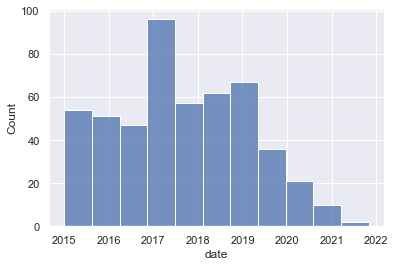

In [608]:
sns.histplot(df['date'])

<AxesSubplot:xlabel='kilometers', ylabel='Count'>

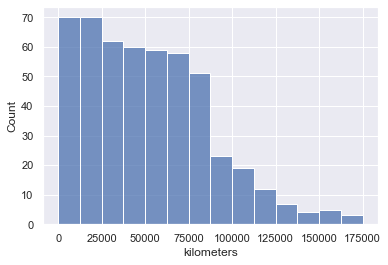

In [657]:
sns.histplot(df['kilometers'])

In [673]:
df['kilometers'] = df['kilometers'].replace(['n/a'],500) # this is an educated repacement, as cars with n/a in kilometers appear to be either new or display

In [686]:
df['date'][0].toordinal()

736389

Text(0.5, 1.0, 'Mileage and Price')

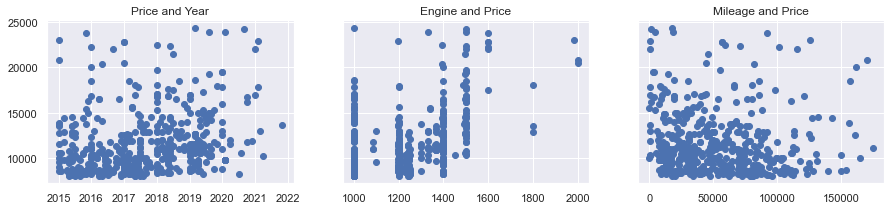

In [769]:
f, (ax1, ax2, ax3) = pt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(df['date'],df['price'])
ax1.set_title('Price and Year')
ax2.scatter(df['engine_cc'],df['price'])
ax2.set_title('Engine and Price')
ax3.scatter(df['kilometers'],df['price'])
ax3.set_title('Mileage and Price')

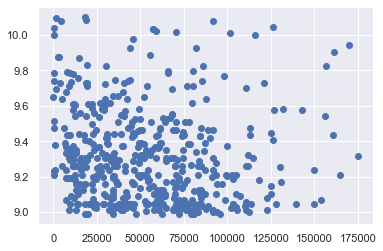

In [770]:
log_price = np.log(df.price)
df.loc[:,('log_price')] = log_price

pt.scatter(df['kilometers'],df['log_price'])

### Multicollinearity

In [771]:
df.columns.values

array(['brand', 'price', 'kilometers', 'engine_cc', 'engine_bhp', 'date',
       'fuel', 'gear', 'year', 'oil', 'gas', 'hybrid', 'log_price'],
      dtype=object)

In [793]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df[['kilometers','engine_cc']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [885]:
vif

,VIF,features
0,3.199621,kilometers
1,3.199621,engine_cc


In [743]:
years = [date1.year for date1 in df['date']]
#variables.loc[:,('year')] = years
df.loc[:,'year'] = years
#varialbes.loc['year'] = [date1.year for date1 in df['date']]

In [761]:
FuelType = []
for fuelType in df.fuel:
    oil = False
    gas = False
    hyb = False
    for ggg in fuelType:
        oil = oil or ggg.lower()=='βενζίνη'
        gas = gas or ggg.lower()=='αέριο'
        hyb = hyb or ggg.lower()=='υβριδικό'
    FuelType.append([oil,gas,hyb])

In [764]:
df.loc[:,['oil','gas','hybrid']] = FuelType

In [889]:
data_fit_regression = df.drop(['date','fuel','log_price','oil'], axis=1)

In [890]:
data_fit_regression = data_fit_regression.replace({True:1, False:0})

In [891]:
data_dummies = pd.get_dummies(data_fit_regression, drop_first=True)

In [892]:
data_dummies.columns.values

array(['price', 'kilometers', 'engine_cc', 'engine_bhp', 'gear', 'year',
       'gas', 'hybrid', 'brand_Audi', 'brand_Bmw', 'brand_Citroen',
       'brand_Fiat', 'brand_Ford', 'brand_Honda', 'brand_Hyundai',
       'brand_Kia', 'brand_Mazda', 'brand_Mercedes-Benz', 'brand_Mini',
       'brand_Mitsubishi', 'brand_Nissan', 'brand_Opel', 'brand_Peugeot',
       'brand_Renault', 'brand_Seat', 'brand_Skoda', 'brand_Smart',
       'brand_Suzuki', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo'],
      dtype=object)

In [893]:
data_preprocessed = data_dummies.drop(['engine_bhp'], axis=1)

In [895]:
targets = data_preprocessed['price']
inputs  = data_preprocessed.drop('price', axis=1)

In [896]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [897]:
inputs_scaled = scaler.transform(inputs)

In [898]:
### Train test split
from sklearn.model_selection import train_test_split

x_train, x_text, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [899]:
### Create the regression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [900]:
y_hat = reg.predict(x_train)

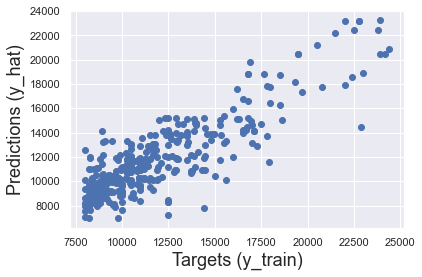

In [912]:
pt.scatter(y_train, y_hat)
pt.xlabel('Targets (y_train)',size=18)
pt.ylabel('Predictions (y_hat)',size=18)
#pt.xlim(6,13)
#pt.ylim(6,13)
pt.show()

C:\Users\const\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

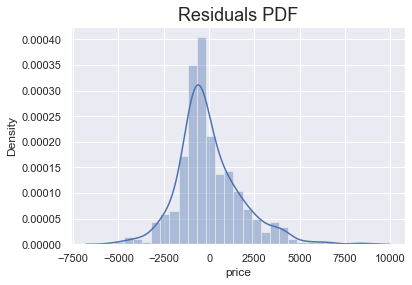

In [904]:
sns.distplot(y_train - y_hat)
pt.title("Residuals PDF", size=18)

In [913]:
reg.score(x_train,y_train)

0.7525744228163849

In [914]:
### weights and bias
reg.intercept_

11506.205923654585

In [907]:
reg.coef_

array([ -151.67569444,  1207.29483096,   426.38631508,  1226.7410256 ,
          40.48548077,   116.89917183,   833.77543532,   233.01831273,
        -573.12553009, -1329.1185665 ,  -294.9139646 ,   133.90647132,
        -881.62274925,  -622.17215913,  -168.8436784 ,   783.7096222 ,
         366.96273281,  -309.94931525,  -869.49181717,  -995.93248051,
        -527.26188489,  -168.34110736,   -37.63243765,    89.96970986,
        -154.20203105,  -751.25233472,  -818.06719701,   492.7828582 ,
          96.02480076])

In [908]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,kilometers,-151.675694
1,engine_cc,1207.294831
2,gear,426.386315
3,year,1226.741026
4,gas,40.485481
5,hybrid,116.899172
6,brand_Audi,833.775435
7,brand_Bmw,233.018313
8,brand_Citroen,-573.125530
9,brand_Fiat,-1329.118567


In [881]:
ls1 = df['brand'].unique().tolist()
ls1.sort()
print(ls1)

['Alfa', 'Audi', 'Bmw', 'Citroen', 'Fiat', 'Ford', 'Honda', 'Hyundai', 'Kia', 'Mazda', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Renault', 'Seat', 'Skoda', 'Smart', 'Suzuki', 'Toyota', 'Volkswagen', 'Volvo']


In [930]:
df.loc[df['gear']==True].sum()

brand         ToyotaVolkswagenNissanVolkswagenToyotaToyotaOp...
price                                                   1505085
kilometers                                              6277281
engine_cc                                                146915
engine_bhp                                                11883
fuel          [Υβριδικό, βενζίνη, Φυσικό, αέριο, cng, βενζίν...
gear                                                        109
year                                                     219861
oil                                                         109
gas                                                           2
hybrid                                                       19
log_price                                            1034.59356
dtype: object